In [46]:
# author: SaKuRa Pop
# data: 2021/4/17 15:21
import pywt
from scipy.signal import cwt
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [62]:
def compute_snr(pure_signal, noisy_signal):
    signal_to_noise_ratio = 10 * (np.log10(np.std(pure_signal)/np.std(noisy_signal-pure_signal)))
    return signal_to_noise_ratio

# 加载数据

In [48]:
"""模拟数据 （透射谱）"""
no_noise_path = r"D:\PYHTON\python3.7\DeepLearningProgram\深度学习滤波器\1000组模拟数据\提供给模型的数据\模拟数据\CH_nonoise_spectral.npy"
CH4_no_noise_spectral = np.load(no_noise_path)  # (1000, 1111) 透射谱（吸收谱）
noisy_path = r"D:\PYHTON\python3.7\DeepLearningProgram\深度学习滤波器\1000组模拟数据\提供给模型的数据\模拟数据\CH_noisy_spectral.npy"
CH4_noisy_spectral = np.load(noisy_path)  # (1000, 1111) 透射谱（吸收谱）

选择600ppm用来展示wavelet transform filter的滤波效果

In [63]:
index = 600
test = CH4_noisy_spectral[index]  # 选择600ppm作为测试数据
ground_truth = CH4_no_noise_spectral[index]  # 选择600ppm无噪声信号作为真值

-1.3689513309729415


# 构造DWTF, 选择sym5小波，soft滤波，threshold=0.9

In [66]:
# Create wavelet object and define parameters
mode = pywt.Modes.smooth
wavelet = pywt.Wavelet('sym5')  # 选用Daubechies8小波
maxlev = pywt.dwt_max_level(len(test), wavelet.dec_len)  # maximum level is 6
print("maximum level is " + str(maxlev))
threshold1 = 0.9  # threshold coefficient
threshold2 = 0.08  # threshold coefficient

# Decompose into wavelet components, to the level selected:
coefficients = pywt.wavedec(test, wavelet, level=maxlev)  # 将信号进行小波分解

for i in range(1, len(coefficients)):
    coefficients[i] = pywt.threshold(coefficients[i], 
                                     threshold1*max(coefficients[i]))  # 将噪声滤波
reconstructed_signal1 = pywt.waverec(coefficients, wavelet)[:1111]  # 将信号进行小波重构

maximum level is 6


画图展示结果，小波变换滤波后的效果目前看来是最好的。

(1111,)


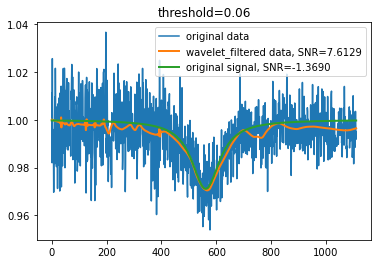

In [70]:

plt.figure()
plt.title("threshold=0.06")
plt.plot(test, label="original data")
print(reconstructed_signal1.shape)
wavelet_snr = compute_snr(ground_truth, reconstructed_signal1)
plt.plot(reconstructed_signal1, linewidth=2, 
         label="wavelet_filtered data, SNR={:.4f}".format(wavelet_snr))
original_snr = compute_snr(ground_truth, test)
plt.plot(CH4_no_noise_spectral[index], linewidth=2, 
         label="original signal, SNR={:.4f}".format(original_snr))
plt.legend()

plt.show()

草稿纸

In [29]:
data1 = np.concatenate((np.arange(1, 400),
                        np.arange(398, 600),
                        np.arange(601, 1024)))
print(data1.shape)
x = np.linspace(0.082, 2.128, num=1024)[::-1]
print(x.shape)
print(x)

(1024,)
(1024,)
[2.128 2.126 2.124 ... 0.086 0.084 0.082]
